# Train Lunar Lander

Reinforcement Learning to train agent of a Lunar Lander.
The environment is from [gymnasium](https://gymnasium.farama.org/environments/box2d/lunar_lander/).

At each step, the reward:
* is increased/decreased the closer/further the lander is to the landing pad.
* is increased/decreased the slower/faster the lander is moving.
* is decreased the more the lander is tilted (angle not horizontal).
* is increased by 10 points for each leg that is in contact with the ground.
* is decreased by 0.03 points each frame a side engine is firing.
* is decreased by 0.3 points each frame the main engine is firing.
* is increased/decreased by 100 points for landing safely or crashing respectively.

In [1]:
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecVideoRecorder

In [2]:
class CustomCallback(BaseCallback):
    """ A custom callback that derives from ``BaseCallback``. """
    def __init__(self, verbose: int = 0, check_freq: int = 100):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.r_hist = []
        self.cum_rwd = 0.

    def _on_step(self) -> bool:
        self.cum_rwd += np.array(self.locals['rewards'])
        if self.n_calls % self.check_freq == 0:
            rwd = np.mean(self.cum_rwd)
            print(f"RL callback at step {self.n_calls}/{self.locals['total_timesteps']}: reward = {rwd}")
            self.r_hist.append(rwd)
            self.cum_rwd = 0.
        return True

# Train agent

In [4]:
env_kwargs = {"render_mode": "rgb_array"}
env = make_vec_env('LunarLander-v2', n_envs=1, env_kwargs=env_kwargs)
cb = CustomCallback(check_freq=2500)

ppo = PPO("MlpPolicy", env, verbose=0)

In [5]:
ppo.learn(total_timesteps=100000, reset_num_timesteps=False, callback=cb)

RL callback at step 2500/100000: reward = -4709.79150390625
RL callback at step 5000/100000: reward = -4934.810546875
RL callback at step 7500/100000: reward = -4466.66845703125
RL callback at step 10000/100000: reward = -3982.9326171875
RL callback at step 12500/100000: reward = -2608.5439453125
RL callback at step 15000/100000: reward = -2428.774658203125
RL callback at step 17500/100000: reward = -2395.892822265625
RL callback at step 20000/100000: reward = -1421.634765625
RL callback at step 22500/100000: reward = -822.7759399414062
RL callback at step 25000/100000: reward = -1040.6541748046875
RL callback at step 27500/100000: reward = -1703.4918212890625
RL callback at step 30000/100000: reward = -560.1445922851562
RL callback at step 32500/100000: reward = -1640.68505859375
RL callback at step 35000/100000: reward = -1473.90771484375
RL callback at step 37500/100000: reward = -406.50762939453125
RL callback at step 40000/100000: reward = -777.007080078125
RL callback at step 425

Text(0.5, 0, 'N steps')

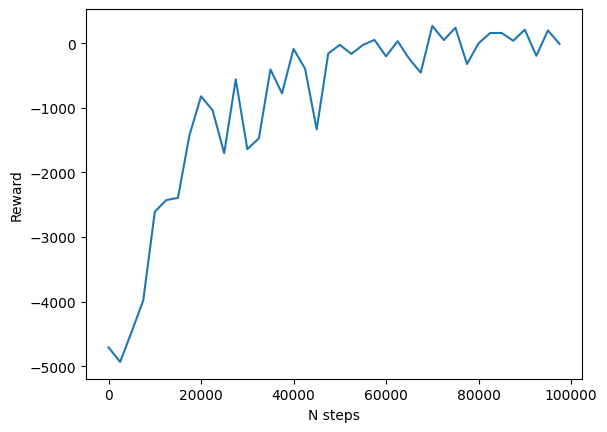

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(cb.r_hist))*2500, cb.r_hist)
plt.ylabel('Reward')  # total reward every 2500 time steps
plt.xlabel('N steps')


# Create .gif of trained model

In [18]:
v_env = VecVideoRecorder(env, './results',
                         record_video_trigger=lambda x: x == 0, video_length=600,
                         name_prefix="LunarLander")

In [19]:
obs = v_env.reset()
for _ in range(1000):
    action, _states = ppo.predict(obs)
    obs, rewards, dones, info = v_env.step(action)
    if dones[0]:
        break

Saving video to /home/roberto/Documents/portfolio_projects/MachineLearning/results/LunarLander-step-0-to-step-600.mp4
Moviepy - Building video /home/roberto/Documents/portfolio_projects/MachineLearning/results/LunarLander-step-0-to-step-600.mp4.
Moviepy - Writing video /home/roberto/Documents/portfolio_projects/MachineLearning/results/LunarLander-step-0-to-step-600.mp4



Moviepy - Done !
Moviepy - video ready /home/roberto/Documents/portfolio_projects/MachineLearning/results/LunarLander-step-0-to-step-600.mp4


In [21]:
env.close()

In [28]:
from moviepy.editor import VideoFileClip

videoClip = VideoFileClip("./results/LunarLander-step-0-to-step-600.mp4")
videoClip.write_gif("TrainedLunarLander.gif", fps=20.0)  # smaller fps to reduce .gif size

MoviePy - Building file TrainedLunarLander.gif with imageio.
